# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [60]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

In [61]:
import pandas as pd

# 2. 외부데이터 읽기(csv, 읽고 쓰기)
공공데이터 자료 읽기

In [62]:
data = pd.read_csv('../data/2012_2014_교통사망사고정보.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte

In [ ]:
df = pd.read_csv('../data/2012_2014_교통사망사고정보.csv', encoding='euc-kr')

In [ ]:
df.head()

In [ ]:
df.to_csv('../output/mydata.csv')

엑셀로 읽고 쓰기를 할 경우
- pd.read_excel('/~.xlsx')
- data.to_excel('/~.xlsx')

# 3. 상세 정보확인

## 3.1 내용 확인

In [ ]:
df.head()
df.tail()

## 3.2 크기 확인

In [ ]:
df.shape
df.index
df.columns

In [ ]:
df.values

In [ ]:
len(df)
len(df.index)
len(df.columns)

## 3.3 기본 속성 확인

In [ ]:
df.describe()
df.describe(include='all')

In [ ]:
type(df.describe())

In [ ]:
df.describe().index
df.describe().columns

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.count()

In [ ]:
df.nunique()

## 3.4 결측치 확인

In [ ]:
df.isnull()
df.isnull().head(3)

In [ ]:
df.notnull()
df.notnull()*1

In [ ]:
df.isnull().sum()

## 3.5 aggregate 함수로 기본 통계 확인

In [ ]:
df.sum()

In [ ]:
df.columns

In [ ]:
df['사망자수']
type(df['사망자수'])  # 시리즈

In [ ]:
df['사망자수'].sum()

In [ ]:
df['사망자수'].mean()
df['사망자수'].std()
df['사망자수'].count()
df['사망자수'].median()
df['사망자수'].quantile([0.25, 0.5])
df['사망자수'].max()
df['사망자수'].min()

In [ ]:
df['사망자수'].isnull()
df['사망자수'].isnull().sum()
df['사망자수'].notnull().sum()

## 3.6 컬럼(변수)의 유형별 빈도 확인

In [ ]:
df.columns

In [ ]:
df['요일'].value_counts()
df['요일'].value_counts().index
df['요일'].value_counts().values

In [ ]:
df['요일'].value_counts()['수']
df['요일'].value_counts().sort_values()
df['요일'].value_counts().sort_values(ascending=False)
df['요일'].value_counts().sort_index()

## 3.7 시각화

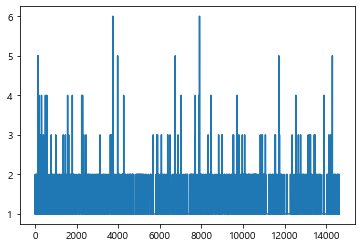

In [63]:
df['사망자수'].plot()

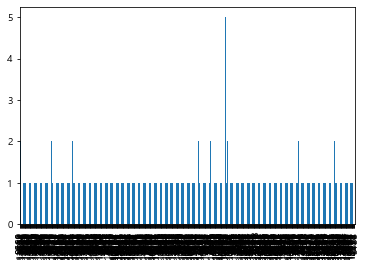

In [64]:
df['사망자수'].sample(frac=0.05).plot(kind='bar')

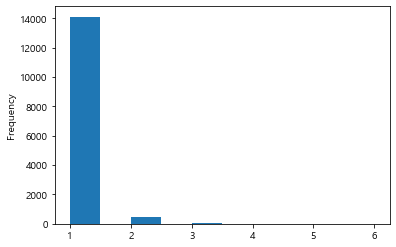

In [65]:
df['사망자수'].plot(kind='hist')

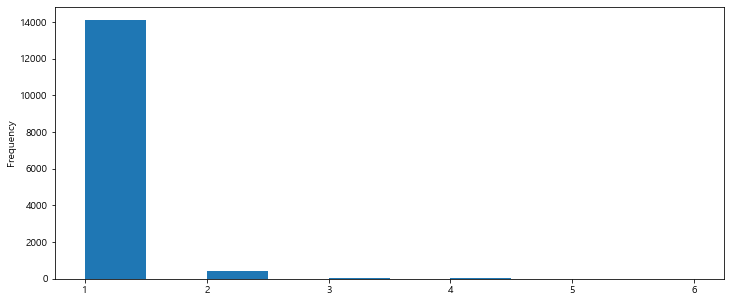

In [66]:
df['사망자수'].plot(kind='hist', figsize=(12,5))

In [67]:
import warnings
warnings.filterwarnings(action='ignore')

월    2181
토    2176
화    2163
금    2121
목    2095
수    2042
일    1846
Name: 요일, dtype: int64

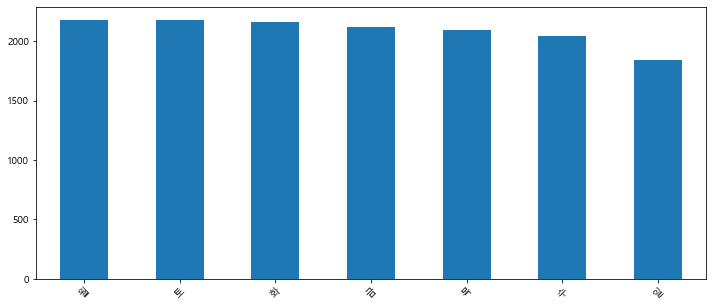

In [68]:
df['요일'].value_counts()
df['요일'].value_counts().plot(kind='bar', rot='45', figsize=(12,5))

In [69]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 안깨지기

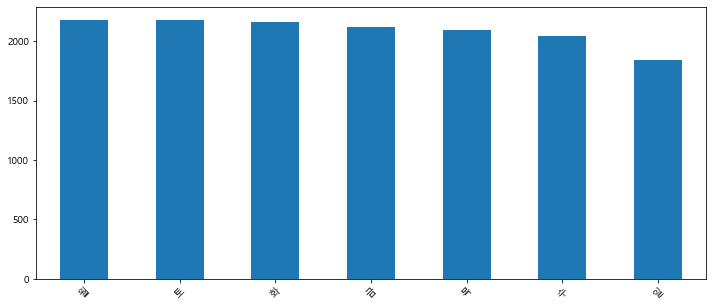

In [70]:
df['요일'].value_counts().plot(kind='bar', rot='45', figsize=(12,5))

# 4. groupby

deep copy

In [38]:
import numpy as np

In [75]:
x =1
id(x)

140708343619984

In [79]:
tf = pd.DataFrame({'학생':np.random.choice(np.arange(10,20), 5, replace=False),
                   '국어':np.random.randint(70,101,5),
                   '수학': np.random.randint(60, 101, 5)})
tf

,학생,국어,수학
0,18,90,68
1,17,78,85
2,12,79,68
3,19,93,83
4,10,91,76


In [81]:
new_tf = tf.copy()             # 메모리 주소를 복사하여서 같이 변동됨, new_tf = tf.copy() 하면 값 자체를 복사(deep copy)
new_tf
new_tf.iloc[0,2] =100
new_tf

,학생,국어,수학
0,18,90,68
1,17,78,85
2,12,79,68
3,19,93,83
4,10,91,76


,학생,국어,수학
0,18,90,100
1,17,78,85
2,12,79,68
3,19,93,83
4,10,91,76


In [82]:
tf

,학생,국어,수학
0,18,90,68
1,17,78,85
2,12,79,68
3,19,93,83
4,10,91,76


## 객체(변수)가 mutable or not

In [76]:
a = [1,2,3,4]
b = a
a
b

[1, 2, 3, 4]

[1, 2, 3, 4]

In [77]:
b.remove(3)
b

[1, 2, 4]

In [78]:
a

[1, 2, 4]

## <font color='red'> Deep copy (중간에 데이터 확보)

In [45]:
data = df.copy()

In [46]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

## unstack()

In [47]:
data.groupby('발생년').사고유형.count()

발생년
2012    5165
2013    4876
2014    4583
Name: 사고유형, dtype: int64

In [48]:
data.groupby('발생년').사고유형.value_counts()

발생년   사고유형      
2012  기타            1216
      횡단중            998
      측면직각충돌         745
      공작물충돌          580
      진행중 추돌         334
      정면충돌           298
      전도전복           257
      주정차중 추돌        216
      차도통행중          173
      도로이탈 추락        116
      길가장자리구역통행중      90
      보도통행중           81
      도로이탈 기타         56
      주/정차차량 충돌        3
      경보기 무시           1
      차단기돌파            1
2013  기타            1359
      횡단중            919
      측면직각충돌         565
      공작물충돌          539
      진행중 추돌         320
      정면충돌           256
      전도전복           253
      주정차중 추돌        179
      차도통행중          162
      도로이탈 추락        129
      길가장자리구역통행중      83
      보도통행중           57
      도로이탈 기타         52
      주/정차차량 충돌        2
      직전진행             1
2014  기타            1410
      횡단중            874
      측면직각충돌         538
      공작물충돌          436
      진행중 추돌         294
      정면충돌           230
      전도전복           218
      주정차중 추돌        177
      차도

In [49]:
data.groupby('발생년').사고유형.value_counts().unstack()

사고유형,경보기 무시,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도전복,정면충돌,주/정차차량 충돌,주정차중 추돌,직전진행,진행중 추돌,차단기돌파,차도통행중,측면직각충돌,횡단중
발생년,,,,,,,,,,,,,,,,,
2012,1.0,580.0,1216.0,90.0,56.0,116.0,81.0,257.0,298.0,3.0,216.0,NaN,334.0,1.0,173.0,745.0,998.0
2013,NaN,539.0,1359.0,83.0,52.0,129.0,57.0,253.0,256.0,2.0,179.0,1.0,320.0,NaN,162.0,565.0,919.0
2014,NaN,436.0,1410.0,79.0,41.0,96.0,45.0,218.0,230.0,3.0,177.0,NaN,294.0,NaN,142.0,538.0,874.0


In [50]:
data.groupby('발생년').사고유형.value_counts().unstack().fillna(0)

사고유형,경보기 무시,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도전복,정면충돌,주/정차차량 충돌,주정차중 추돌,직전진행,진행중 추돌,차단기돌파,차도통행중,측면직각충돌,횡단중
발생년,,,,,,,,,,,,,,,,,
2012,1.0,580.0,1216.0,90.0,56.0,116.0,81.0,257.0,298.0,3.0,216.0,0.0,334.0,1.0,173.0,745.0,998.0
2013,0.0,539.0,1359.0,83.0,52.0,129.0,57.0,253.0,256.0,2.0,179.0,1.0,320.0,0.0,162.0,565.0,919.0
2014,0.0,436.0,1410.0,79.0,41.0,96.0,45.0,218.0,230.0,3.0,177.0,0.0,294.0,0.0,142.0,538.0,874.0


## 5. 컬럼명 바꾸기

In [88]:
data.columns

Index(['사고년도', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분',
       '법규위반_대분류', '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당',
       '당사자종별_2당_대분류', '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [87]:
data.rename(columns = {'발생년' : '사고년도', '사고유형':'사고유형구분'}, inplace = True)

In [52]:
pd.crosstab(data.사고년도, data.사고유형구분)

사고유형구분,경보기 무시,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도전복,정면충돌,주/정차차량 충돌,주정차중 추돌,직전진행,진행중 추돌,차단기돌파,차도통행중,측면직각충돌,횡단중
사고년도,,,,,,,,,,,,,,,,,
2012,1,580,1216,90,56,116,81,257,298,3,216,0,334,1,173,745,998
2013,0,539,1359,83,52,129,57,253,256,2,179,1,320,0,162,565,919
2014,0,436,1410,79,41,96,45,218,230,3,177,0,294,0,142,538,874


In [53]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count')

사고유형구분,경보기 무시,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도전복,정면충돌,주/정차차량 충돌,주정차중 추돌,직전진행,진행중 추돌,차단기돌파,차도통행중,측면직각충돌,횡단중
사고년도,,,,,,,,,,,,,,,,,
2012,1.0,580.0,1216.0,90.0,56.0,116.0,81.0,257.0,298.0,3.0,216.0,NaN,334.0,1.0,173.0,745.0,998.0
2013,NaN,539.0,1359.0,83.0,52.0,129.0,57.0,253.0,256.0,2.0,179.0,1.0,320.0,NaN,162.0,565.0,919.0
2014,NaN,436.0,1410.0,79.0,41.0,96.0,45.0,218.0,230.0,3.0,177.0,NaN,294.0,NaN,142.0,538.0,874.0


In [54]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['법규위반_대분류'])

법규위반_대분류,보행자과실,운전자법규위반,정비불량
사고년도,,,
2012,NaN,0.260070,4.0
2013,NaN,0.253486,NaN
2014,1.0,0.220912,0.0


### groupby, pivot, crosstab 동일한 결과

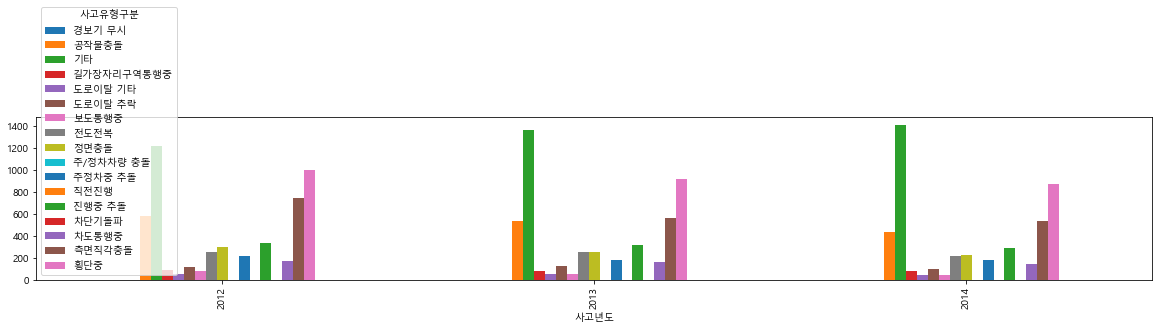

In [55]:
data.groupby('사고년도').사고유형구분.value_counts().unstack().plot(kind='bar', figsize=(20,3))

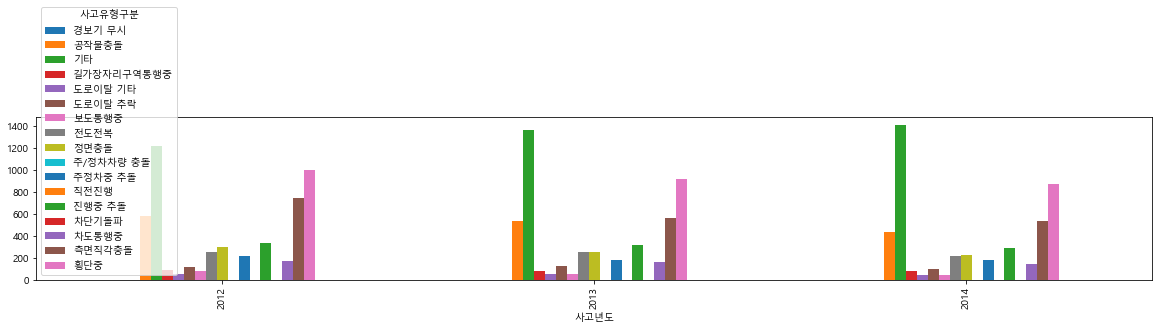

In [56]:
pd.crosstab(data.사고년도, data.사고유형구분).plot(kind='bar', figsize=(20,3))

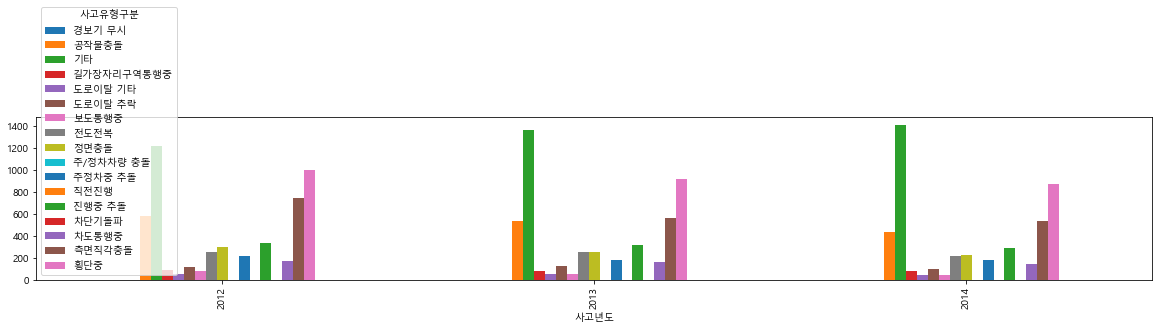

In [57]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count').plot(kind='bar', figsize=(20,3))

In [58]:
data.groupby('사고유형구분').사상자수.agg(['count', 'median', 'min', 'max', 'mean', 'var', 'std'])

,count,median,min,max,mean,var,std
사고유형구분,,,,,,,
경보기 무시,1,1,1,1,1.000000,NaN,NaN
공작물충돌,1555,1,1,27,1.508682,1.645195,1.282651
기타,3985,1,1,57,1.481305,2.989171,1.728922
길가장자리구역통행중,252,1,1,6,1.190476,0.465566,0.682324
도로이탈 기타,149,1,1,8,1.543624,1.182206,1.087293
도로이탈 추락,341,1,1,10,1.384164,0.813748,0.902080
보도통행중,183,1,1,7,1.267760,0.570768,0.755492
전도전복,728,1,1,26,1.641484,3.149143,1.774583
정면충돌,784,2,1,40,2.772959,7.700622,2.774999


In [59]:
data.groupby('사고유형구분').사상자수.describe()

,count,mean,std,min,25%,50%,75%,max
사고유형구분,,,,,,,,
경보기 무시,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
공작물충돌,1555.0,1.508682,1.282651,1.0,1.0,1.0,2.00,27.0
기타,3985.0,1.481305,1.728922,1.0,1.0,1.0,1.00,57.0
길가장자리구역통행중,252.0,1.190476,0.682324,1.0,1.0,1.0,1.00,6.0
도로이탈 기타,149.0,1.543624,1.087293,1.0,1.0,1.0,2.00,8.0
도로이탈 추락,341.0,1.384164,0.902080,1.0,1.0,1.0,1.00,10.0
보도통행중,183.0,1.267760,0.755492,1.0,1.0,1.0,1.00,7.0
전도전복,728.0,1.641484,1.774583,1.0,1.0,1.0,2.00,26.0
정면충돌,784.0,2.772959,2.774999,1.0,1.0,2.0,3.00,40.0


# 6. reset_index(), set_index

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14624 entries, 0 to 14623
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사고년도          14624 non-null  int64         
 1   발생년월일시        14624 non-null  datetime64[ns]
 2   발생분           14624 non-null  int64         
 3   주야            14624 non-null  object        
 4   요일            14624 non-null  object        
 5   사망자수          14624 non-null  int64         
 6   사상자수          14624 non-null  int64         
 7   중상자수          14624 non-null  int64         
 8   경상자수          14624 non-null  int64         
 9   부상신고자수        14624 non-null  int64         
 10  발생지시도         14624 non-null  object        
 11  발생지시군구        14624 non-null  object        
 12  사고유형_대분류      14624 non-null  object        
 13  사고유형_중분류      14624 non-null  object        
 14  사고유형구분        14624 non-null  object        
 15  법규위반_대분류      14624 non-null  object

In [91]:
data['발생년월일시'].dtypes

dtype('O')

날짜형태의 자료로 변경

In [92]:
data['발생년월일시'] = pd.to_datetime(data['발생년월일시'])

In [93]:
data['발생년월일시'].dtypes 

dtype('<M8[ns]')

In [188]:
data.columns

Index(['사고년도', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분',
       '법규위반_대분류', '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당',
       '당사자종별_2당_대분류', '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

컬럼 줄이기

In [95]:
data = data[['사고년도', '발생년월일시', '주야', '요일', '사망자수',
             '사상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', 
             '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분']]
data

,사고년도,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2012,2012-05-09 01:00:00,야간,수,1,1,0,0,0,경남,거창군,차대차,추돌,진행중 추돌
1,2012,2012-03-30 13:00:00,주간,금,1,1,0,0,0,경기,용인시,차대차,추돌,주정차중 추돌
2,2012,2012-10-26 20:00:00,야간,금,1,2,1,0,0,경북,김천시,차대차,측면직각충돌,측면직각충돌
3,2012,2012-06-28 14:00:00,주간,목,1,1,0,0,0,경기,이천시,차대차,추돌,주정차중 추돌
4,2012,2012-06-18 04:00:00,야간,월,1,1,0,0,0,전남,광양시,차대차,추돌,진행중 추돌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,2014,2014-07-05 16:00:00,주간,토,1,1,0,0,0,경북,의성군,차대사람,기타,기타
14620,2014,2014-07-12 18:00:00,야간,토,1,8,2,5,0,전북,익산시,차대차,측면직각충돌,측면직각충돌
14621,2014,2014-07-15 04:00:00,야간,화,2,6,2,2,0,경북,경산시,차대차,기타,기타
14622,2014,2014-07-10 20:00:00,야간,목,1,3,0,2,0,경남,합천군,차대차,추돌,진행중 추돌


In [97]:
data.head(2)

,사고년도,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2012,2012-05-09 01:00:00,야간,수,1,1,0,0,0,경남,거창군,차대차,추돌,진행중 추돌
1,2012,2012-03-30 13:00:00,주간,금,1,1,0,0,0,경기,용인시,차대차,추돌,주정차중 추돌


In [98]:
data.set_index('발생년월일시')

,사고년도,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
발생년월일시,,,,,,,,,,,,,
2012-05-09 01:00:00,2012,야간,수,1,1,0,0,0,경남,거창군,차대차,추돌,진행중 추돌
2012-03-30 13:00:00,2012,주간,금,1,1,0,0,0,경기,용인시,차대차,추돌,주정차중 추돌
2012-10-26 20:00:00,2012,야간,금,1,2,1,0,0,경북,김천시,차대차,측면직각충돌,측면직각충돌
2012-06-28 14:00:00,2012,주간,목,1,1,0,0,0,경기,이천시,차대차,추돌,주정차중 추돌
2012-06-18 04:00:00,2012,야간,월,1,1,0,0,0,전남,광양시,차대차,추돌,진행중 추돌
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-05 16:00:00,2014,주간,토,1,1,0,0,0,경북,의성군,차대사람,기타,기타
2014-07-12 18:00:00,2014,야간,토,1,8,2,5,0,전북,익산시,차대차,측면직각충돌,측면직각충돌
2014-07-15 04:00:00,2014,야간,화,2,6,2,2,0,경북,경산시,차대차,기타,기타


In [99]:
data.set_index('발생년월일시').reset_index()

,발생년월일시,사고년도,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2012-05-09 01:00:00,2012,야간,수,1,1,0,0,0,경남,거창군,차대차,추돌,진행중 추돌
1,2012-03-30 13:00:00,2012,주간,금,1,1,0,0,0,경기,용인시,차대차,추돌,주정차중 추돌
2,2012-10-26 20:00:00,2012,야간,금,1,2,1,0,0,경북,김천시,차대차,측면직각충돌,측면직각충돌
3,2012-06-28 14:00:00,2012,주간,목,1,1,0,0,0,경기,이천시,차대차,추돌,주정차중 추돌
4,2012-06-18 04:00:00,2012,야간,월,1,1,0,0,0,전남,광양시,차대차,추돌,진행중 추돌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,2014-07-05 16:00:00,2014,주간,토,1,1,0,0,0,경북,의성군,차대사람,기타,기타
14620,2014-07-12 18:00:00,2014,야간,토,1,8,2,5,0,전북,익산시,차대차,측면직각충돌,측면직각충돌
14621,2014-07-15 04:00:00,2014,야간,화,2,6,2,2,0,경북,경산시,차대차,기타,기타
14622,2014-07-10 20:00:00,2014,야간,목,1,3,0,2,0,경남,합천군,차대차,추돌,진행중 추돌


In [103]:
data.사고유형구분.value_counts().index

Index(['기타', '횡단중', '측면직각충돌', '공작물충돌', '진행중 추돌', '정면충돌', '전도전복', '주정차중 추돌',
       '차도통행중', '도로이탈 추락', '길가장자리구역통행중', '보도통행중', '도로이탈 기타', '주/정차차량 충돌',
       '차단기돌파', '경보기 무시', '직전진행'],
      dtype='object')

In [105]:
data.사고유형구분.value_counts().reset_index()['index'].to_list()

['기타',
 '횡단중',
 '측면직각충돌',
 '공작물충돌',
 '진행중 추돌',
 '정면충돌',
 '전도전복',
 '주정차중 추돌',
 '차도통행중',
 '도로이탈 추락',
 '길가장자리구역통행중',
 '보도통행중',
 '도로이탈 기타',
 '주/정차차량 충돌',
 '차단기돌파',
 '경보기 무시',
 '직전진행']

In [107]:
data_sum = data.사고유형구분.value_counts().reset_index()
data_sum

,index,사고유형구분
0,기타,3985
1,횡단중,2791
2,측면직각충돌,1848
3,공작물충돌,1555
4,진행중 추돌,948
5,정면충돌,784
6,전도전복,728
7,주정차중 추돌,572
8,차도통행중,477
9,도로이탈 추락,341


### 컬럼명을 변경

In [108]:
data_sum.columns = ['사고유형', '사고건수'] # 컬럼의 개수가 동일하여야 함
data_sum

,사고유형,사고건수
0,기타,3985
1,횡단중,2791
2,측면직각충돌,1848
3,공작물충돌,1555
4,진행중 추돌,948
5,정면충돌,784
6,전도전복,728
7,주정차중 추돌,572
8,차도통행중,477
9,도로이탈 추락,341


### 컬럼명 변경 - rename 메소드 이용

In [195]:
data_col = data_col.rename(columns ={'사고유형구분':'유형', '발생건수':'건수'})
data_col.columns

Index(['유형', '건수'], dtype='object')

In [196]:
data_col = data_col.rename(columns ={'유형':'사고유형구분', '건수':'발생건수'})
data_col.columns

Index(['사고유형구분', '발생건수'], dtype='object')

### 컬럼명 변경 - columns 값 치환

In [197]:
data_col.columns = ['유형', '건수']
data_col.columns
data_col

Index(['유형', '건수'], dtype='object')

,유형,건수
0,진행중 추돌,거창군
1,주정차중 추돌,용인시
2,측면직각충돌,김천시
3,주정차중 추돌,이천시
4,진행중 추돌,광양시
...,...,...
14619,기타,의성군
14620,측면직각충돌,익산시
14621,기타,경산시
14622,진행중 추돌,합천군


## 7. 전체 테이블에 대해 - sort

In [200]:
data

,사고년도,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2012,2012-05-09 01:00:00,야간,수,1,1,0,0,0,경남,거창군,차대차,추돌,진행중 추돌
1,2012,2012-03-30 13:00:00,주간,금,1,1,0,0,0,경기,용인시,차대차,추돌,주정차중 추돌
2,2012,2012-10-26 20:00:00,야간,금,1,2,1,0,0,경북,김천시,차대차,측면직각충돌,측면직각충돌
3,2012,2012-06-28 14:00:00,주간,목,1,1,0,0,0,경기,이천시,차대차,추돌,주정차중 추돌
4,2012,2012-06-18 04:00:00,야간,월,1,1,0,0,0,전남,광양시,차대차,추돌,진행중 추돌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,2014,2014-07-05 16:00:00,주간,토,1,1,0,0,0,경북,의성군,차대사람,기타,기타
14620,2014,2014-07-12 18:00:00,야간,토,1,8,2,5,0,전북,익산시,차대차,측면직각충돌,측면직각충돌
14621,2014,2014-07-15 04:00:00,야간,화,2,6,2,2,0,경북,경산시,차대차,기타,기타
14622,2014,2014-07-10 20:00:00,야간,목,1,3,0,2,0,경남,합천군,차대차,추돌,진행중 추돌


In [203]:
data['부상신고자수'].sort_values() # '사고유형' 컬럼만 소트

0         0
9703      0
9704      0
9705      0
9706      0
         ..
6602      9
10919    14
4275     16
8729     30
1571     67
Name: 부상신고자수, Length: 14624, dtype: int64

In [205]:
data.sort_values('부상신고자수', ascending=False)

,사고년도,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
1571,2012,2012-02-24 15:00:00,주간,금,4,100,6,23,67,강원,고성군,차대차,추돌,진행중 추돌
8729,2014,2014-12-31 19:00:00,야간,수,1,34,3,0,30,경기,화성시,차대차,기타,기타
4275,2013,2013-09-12 19:00:00,야간,목,2,25,3,4,16,경기,의정부시,차대차,추돌,주정차중 추돌
10919,2014,2014-11-04 07:00:00,주간,화,3,20,3,0,14,제주,서귀포시,차대차,정면충돌,정면충돌
6602,2013,2013-10-23 16:00:00,주간,수,1,13,3,0,9,경기,동두천시,차대차,기타,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,2013,2013-12-24 09:00:00,주간,화,2,3,1,0,0,전남,나주시,차량단독,도로이탈,도로이탈 기타
4935,2013,2013-12-28 10:00:00,주간,토,1,1,0,0,0,전북,완주군,차량단독,공작물충돌,공작물충돌
4936,2013,2013-12-28 01:00:00,야간,토,1,5,1,3,0,전북,익산시,차대차,기타,기타
4937,2013,2013-12-21 00:00:00,야간,토,1,1,0,0,0,대구,중구,차대사람,기타,기타


## 8. DataFrame 자료 형태 변환

In [109]:
data.dtypes

사고년도                 int64
발생년월일시      datetime64[ns]
주야                  object
요일                  object
사망자수                 int64
사상자수                 int64
중상자수                 int64
경상자수                 int64
부상신고자수               int64
발생지시도               object
발생지시군구              object
사고유형_대분류            object
사고유형_중분류            object
사고유형구분              object
dtype: object

각 컬럼의 개별 변경

In [207]:
data['사고년도'] = data['사고년도'].astype(float)

각 컬럼의 동시 변경

In [208]:
data = data.astype({'중상자수': float, '사상자수': float})

In [209]:
data['사고유형구분'] = data['사고유형구분'].astype('category')

In [210]:
data['요일'] = data['요일'].astype('category')

In [211]:
data['사고유형구분'].head()

0     진행중 추돌
1    주정차중 추돌
2     측면직각충돌
3    주정차중 추돌
4     진행중 추돌
Name: 사고유형구분, dtype: category
Categories (17, object): ['경보기 무시', '공작물충돌', '기타', '길가장자리구역통행중', ..., '차단기돌파', '차도통행중', '측면직각충돌', '횡단중']

In [212]:
data['사고유형구분'].unique()
sorted(data['사고유형구분'].unique())

['진행중 추돌', '주정차중 추돌', '측면직각충돌', '전도전복', '공작물충돌', ..., '보도통행중', '경보기 무시', '주/정차차량 충돌', '차단기돌파', '직전진행']
Length: 17
Categories (17, object): ['진행중 추돌', '주정차중 추돌', '측면직각충돌', '전도전복', ..., '경보기 무시', '주/정차차량 충돌', '차단기돌파', '직전진행']

['경보기 무시',
 '공작물충돌',
 '기타',
 '길가장자리구역통행중',
 '도로이탈 기타',
 '도로이탈 추락',
 '보도통행중',
 '전도전복',
 '정면충돌',
 '주/정차차량 충돌',
 '주정차중 추돌',
 '직전진행',
 '진행중 추돌',
 '차단기돌파',
 '차도통행중',
 '측면직각충돌',
 '횡단중']

# End 